# Libraries

In [1]:
import pandas as pd
import os
from datetime import datetime
import datetime as dt
from itertools import combinations
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import

In [2]:
df = pd.read_csv('E:/datasets/Sales_Data/main.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


# Complete Analysis

In [3]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186849 entries, 0 to 186848
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [5]:
df.shape

(186849, 6)

In [6]:
df.isnull().sum().sum()

3264

# Dealing with Null Values

In [7]:
print(df[df['Order ID'].isnull()])

       Order ID Product Quantity Ordered Price Each Order Date  \
355         NaN     NaN              NaN        NaN        NaN   
734         NaN     NaN              NaN        NaN        NaN   
1432        NaN     NaN              NaN        NaN        NaN   
1552        NaN     NaN              NaN        NaN        NaN   
1570        NaN     NaN              NaN        NaN        NaN   
...         ...     ...              ...        ...        ...   
185175      NaN     NaN              NaN        NaN        NaN   
185437      NaN     NaN              NaN        NaN        NaN   
186041      NaN     NaN              NaN        NaN        NaN   
186547      NaN     NaN              NaN        NaN        NaN   
186825      NaN     NaN              NaN        NaN        NaN   

       Purchase Address  
355                 NaN  
734                 NaN  
1432                NaN  
1552                NaN  
1570                NaN  
...                 ...  
185175              NaN  

In [8]:
(df.isnull().sum()/len(df))*100

Order ID            0.291144
Product             0.291144
Quantity Ordered    0.291144
Price Each          0.291144
Order Date          0.291144
Purchase Address    0.291144
dtype: float64

In [9]:
df.isnull().sum().sum()/len(df)*100

1.7468651156816468

# In this scenario complete rows are null not the single cell is completed in the entire row and after removing them will only effect less then 2% on the entire dataset.

In [10]:
df_new = df.dropna(axis=0)

In [11]:
df_new.shape

(186305, 6)

In [12]:
df.shape

(186849, 6)

In [13]:
df_new.isnull().sum().sum()

0

In [14]:
start_row = 500
end_row = 550
specific_range = df_new.head(end_row).tail(end_row - start_row)

In [15]:
specific_range

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
501,177038,iPhone,1,700,04/03/2019 12:11,"632 Sunset St, San Francisco, CA 94016"
502,177039,AAA Batteries (4-pack),1,2.99,04/26/19 20:44,"167 2nd St, San Francisco, CA 94016"
503,177040,USB-C Charging Cable,1,11.95,04/15/19 09:27,"485 7th St, San Francisco, CA 94016"
504,177041,Wired Headphones,1,11.99,04/11/2019 12:59,"265 Spruce St, Atlanta, GA 30301"
505,177042,Lightning Charging Cable,1,14.95,04/24/19 06:57,"876 Hill St, San Francisco, CA 94016"
506,177043,27in 4K Gaming Monitor,1,389.99,04/02/2019 22:02,"658 West St, New York City, NY 10001"
507,177044,AA Batteries (4-pack),1,3.84,04/01/2019 20:31,"817 4th St, Atlanta, GA 30301"
508,177045,Flatscreen TV,1,300,04/07/2019 22:40,"570 1st St, New York City, NY 10001"
509,177046,Vareebadd Phone,1,400,04/29/19 13:02,"406 12th St, Los Angeles, CA 90001"
510,177047,Lightning Charging Cable,1,14.95,04/13/19 11:52,"258 Johnson St, New York City, NY 10001"


# On deep anlaysis found that on 518 the top is repeating itself because the main.csv is the result of many files concatinated together . Removing them.

In [16]:
df_new = df_new[pd.to_numeric(df_new['Order ID'], errors='coerce').notna()]

In [17]:
df_new.shape

(185950, 6)

In [18]:
df.shape

(186849, 6)

In [19]:
start_row = 500
end_row = 550
specific_range = df_new.head(end_row).tail(end_row - start_row)
specific_range

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
501,177038,iPhone,1,700,04/03/2019 12:11,"632 Sunset St, San Francisco, CA 94016"
502,177039,AAA Batteries (4-pack),1,2.99,04/26/19 20:44,"167 2nd St, San Francisco, CA 94016"
503,177040,USB-C Charging Cable,1,11.95,04/15/19 09:27,"485 7th St, San Francisco, CA 94016"
504,177041,Wired Headphones,1,11.99,04/11/2019 12:59,"265 Spruce St, Atlanta, GA 30301"
505,177042,Lightning Charging Cable,1,14.95,04/24/19 06:57,"876 Hill St, San Francisco, CA 94016"
506,177043,27in 4K Gaming Monitor,1,389.99,04/02/2019 22:02,"658 West St, New York City, NY 10001"
507,177044,AA Batteries (4-pack),1,3.84,04/01/2019 20:31,"817 4th St, Atlanta, GA 30301"
508,177045,Flatscreen TV,1,300,04/07/2019 22:40,"570 1st St, New York City, NY 10001"
509,177046,Vareebadd Phone,1,400,04/29/19 13:02,"406 12th St, Los Angeles, CA 90001"
510,177047,Lightning Charging Cable,1,14.95,04/13/19 11:52,"258 Johnson St, New York City, NY 10001"


# Changing dateformats of column order_date & Changing the dtypes of other columns.

In [20]:
def standardize(date_str):
    if pd.isnull(date_str):
        return None
    date_formats = ['%Y/%m/%d %H:%M',
                    '%d/%m/%Y %H:%M',
                    '%m/%d/%Y %H:%M',
                    '%y/%m/%d %H:%M',
                    '%d/%m/%y %H:%M',
                    '%m/%d/%y %H:%M']
    for date_format in date_formats:
        try:
            dt = datetime.strptime(date_str, date_format)
            return dt.strftime("%d/%m/%Y %H:%M")
        except ValueError:
            pass
    return date_str 

df_new['Order Date'] = df_new['Order Date'].apply(standardize)
df_new['Order Date']

0         19/04/2019 08:46
1         04/07/2019 22:30
2         04/12/2019 14:38
3         04/12/2019 14:38
4         30/04/2019 09:27
                ...       
186844    17/09/2019 20:56
186845    19/01/2009 16:00
186846    23/09/2019 07:39
186847    19/09/2019 17:30
186848    30/09/2019 00:18
Name: Order Date, Length: 185950, dtype: object

In [21]:
df_new['Order Date'] = pd.to_datetime(df_new['Order Date'], format='%d/%m/%Y %H:%M', errors='coerce')
df_new.dtypes

Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [22]:
# Quantity Ordered

In [23]:
df_new['Quantity Ordered'] = pd.to_numeric(df_new['Quantity Ordered'], errors='coerce')

In [24]:
# Price Each

In [25]:
df_new['Price Each'] = pd.to_numeric(df_new['Price Each'], errors='coerce')

In [26]:
# Order ID

In [27]:
df_new['Order ID'] = pd.to_numeric(df_new['Order ID'], errors='coerce')

In [28]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186848
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 9.9+ MB


In [29]:
df_new.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,2019-07-04 22:30:00,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,2019-12-04 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,2019-12-04 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


# Questions

In [30]:
# -- What was the best month for sales? How much was earned that month?

In [31]:
df_new['Sale'] = df_new['Quantity Ordered'] * df_new['Price Each']

In [32]:
df_new['month'] = df_new['Order Date'].dt.month

In [33]:
monthly_sales = df_new.groupby('month')['Sale'].sum()

In [34]:
best_month = monthly_sales.idxmax()

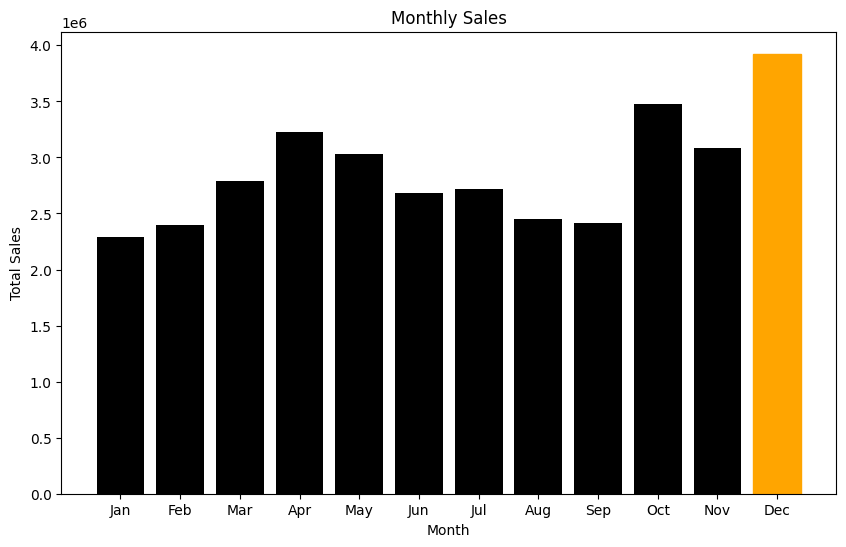

In [97]:
plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_sales.index, monthly_sales.values, color='black')
bars[best_month-1].set_color('orange')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales')
plt.xticks(monthly_sales.index, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [36]:
print(f"Best month was {monthly_sales.idxmax()} and total earning was {monthly_sales.max()}")

Best month was 12 and total earning was 3925406.84


In [37]:
# - What city sold the most product?

In [38]:
y = []
for i in df_new['Purchase Address']:
    x = i.split(',')[1]
    y.append(x)

In [39]:
df_new['City'] = y

In [40]:
df_new.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sale,month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,2019-07-04 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,7,Boston
2,176560,Google Phone,1,600.00,2019-12-04 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,12,Los Angeles
3,176560,Wired Headphones,1,11.99,2019-12-04 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,12,Los Angeles
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles


In [41]:
city_sale = df_new.groupby('City')['Quantity Ordered'].sum().sort_values(ascending=False)
city_sale

City
 San Francisco    50239
 Los Angeles      33289
 New York City    27932
 Boston           22528
 Dallas           16730
 Atlanta          16602
 Seattle          16553
 Portland         14053
 Austin           11153
Name: Quantity Ordered, dtype: int64

In [42]:
top_city = city_sale.idxmax()

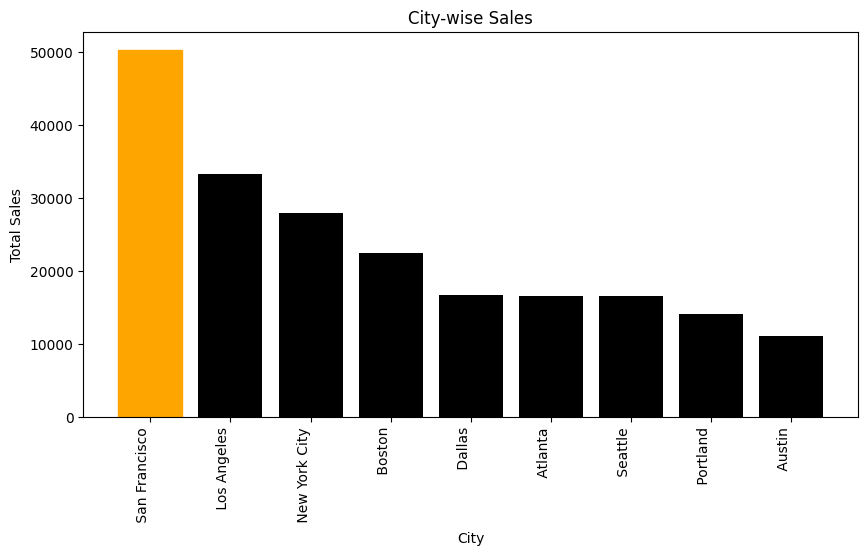

In [95]:
plt.figure(figsize=(10, 5))
bars = plt.bar(list(city_sale.index), city_sale.values, color='black')  # Convert Index to list
bars[list(city_sale.index).index(top_city)].set_color('orange')  # Highlight the top city in orange
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.title('City-wise Sales')
plt.xticks(list(city_sale.index), rotation=90, ha='right')
plt.show()


In [44]:
# - What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [45]:
df_new['Time'] = df_new['Order Date'].dt.time

In [46]:
df_new['Hour'] = df_new['Order Date'].dt.hour

In [47]:
time_wise_sale = df_new.groupby('Hour')['Sale'].sum()

In [48]:
time_wise_sale.idxmax()

19

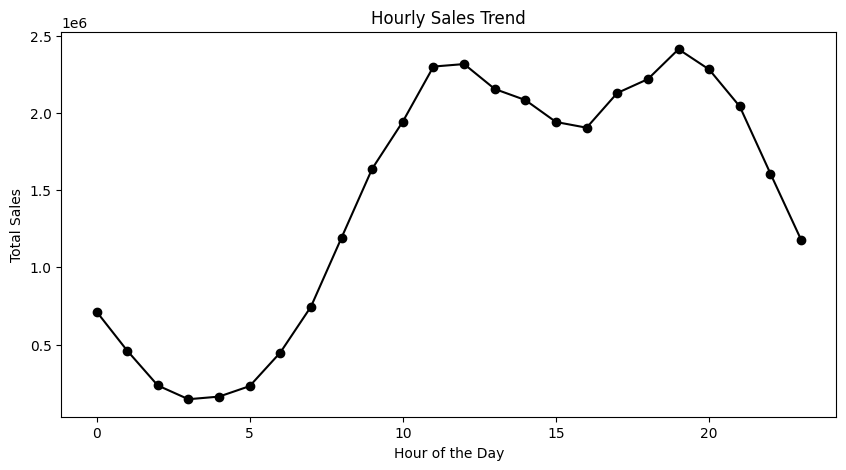

In [96]:
plt.figure(figsize=(10, 5))
plt.plot(time_wise_sale.index, time_wise_sale.values, marker='o',color='black')
plt.title('Hourly Sales Trend')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.grid(False)
plt.show()

In [50]:
# - What products are most often sold together?

In [51]:
df_new['Products Ordered'] = df_new.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

In [52]:
product_combinations = []

for order_products in df_new['Products Ordered']:
    if isinstance(order_products, str):
        product_list = order_products.split(', ')
        if len(product_list) >= 2:
            product_combinations.extend(combinations(product_list, 2))

most_common_combinations = Counter(product_combinations).most_common(10)

for combination, count in most_common_combinations:
    print(f"Products: {', '.join(combination)} - Sold Together {count} times.")

Products: iPhone, Lightning Charging Cable - Sold Together 2140 times.
Products: Google Phone, USB-C Charging Cable - Sold Together 2116 times.
Products: iPhone, Wired Headphones - Sold Together 987 times.
Products: Google Phone, Wired Headphones - Sold Together 949 times.
Products: iPhone, Apple Airpods Headphones - Sold Together 799 times.
Products: Vareebadd Phone, USB-C Charging Cable - Sold Together 773 times.
Products: Google Phone, Bose SoundSport Headphones - Sold Together 503 times.
Products: USB-C Charging Cable, Wired Headphones - Sold Together 452 times.
Products: Vareebadd Phone, Wired Headphones - Sold Together 327 times.
Products: Lightning Charging Cable, Wired Headphones - Sold Together 253 times.


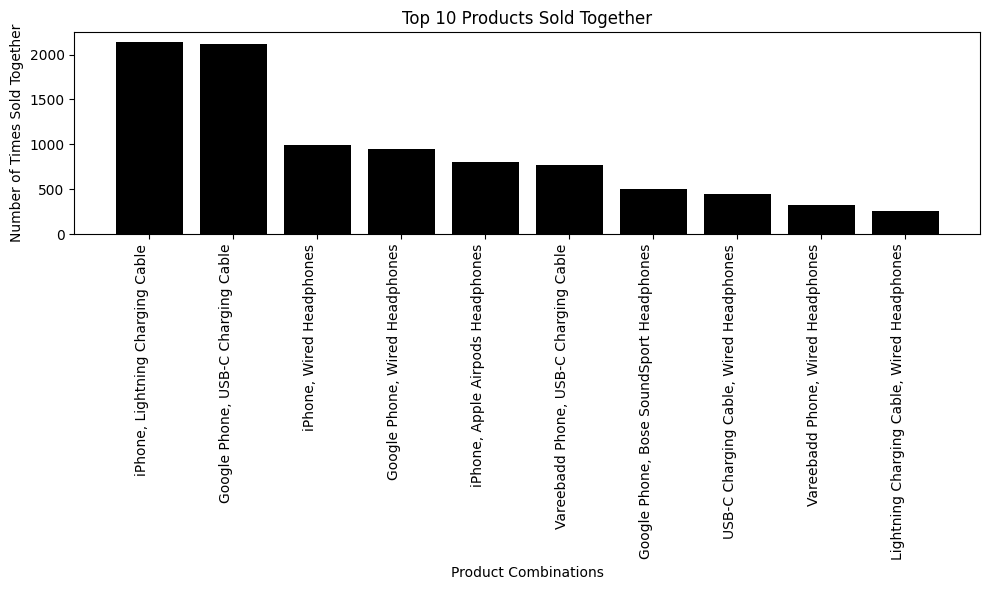

In [92]:
import matplotlib.pyplot as plt

# Extracting product combinations and their counts
products = [', '.join(combination) for combination, count in most_common_combinations]
counts = [count for combination, count in most_common_combinations]

# Creating a bar chart
plt.figure(figsize=(10, 6))
plt.bar(products, counts, color='black')
plt.xlabel('Product Combinations')
plt.ylabel('Number of Times Sold Together')
plt.title('Top 10 Products Sold Together')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


In [54]:
# - What product sold the most? Why do you think it sold the most?

In [55]:
most_selling_product = df_new.groupby('Product')['Sale'].sum()
print(f'most selling product is {most_selling_product.idxmax()} because of the sales {most_selling_product.max()}')

most selling product is Macbook Pro Laptop because of the sales 8037600.0


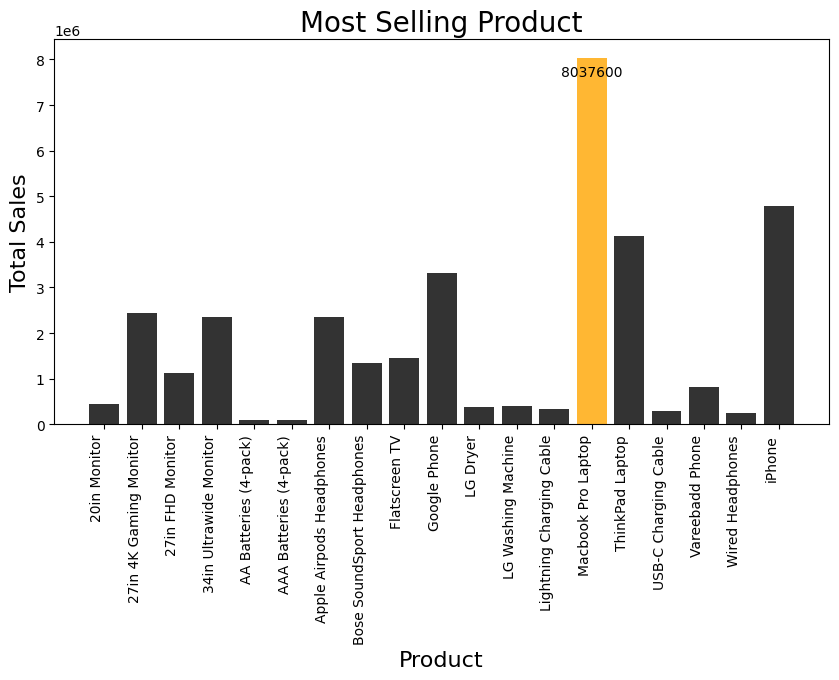

In [89]:
# Plot a bar chart for the most selling product
plt.figure(figsize=(10,5))
plt.bar(most_selling_product.index, most_selling_product.values, alpha=0.8, color=['orange' if product == most_selling_product.idxmax() else 'black' for product in most_selling_product.index])
plt.title('Most Selling Product', fontsize=20)
plt.xlabel('Product', fontsize=16)
plt.ylabel('Total Sales', fontsize=16)
plt.xticks(rotation=90, ha='right')

# Add a label for the most selling product
plt.text(most_selling_product.idxmax(), most_selling_product.max()*0.95, 
         f'{most_selling_product.max():.0f}', ha='center')

plt.show()